In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
data = pd.read_csv('./PS_20174392719_1491204439457_log.csv')

### Data Preprocessing

In [4]:
# Checking data 
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Data description
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# Checking for missing value
missing_data = data.isnull().sum()
missing_data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Checking dupicate data
duplicate_data = data.duplicated().sum()
duplicate_data

0

In [9]:
# Checking the count occurrences of zero values in each column
for column in data.columns:
    zero_count = (data[column] == 0).sum() #counting number of zeros
    print(f"Zeros in column '{column}' : '{zero_count}'")

Zeros in column 'step' : '0'
Zeros in column 'type' : '0'
Zeros in column 'amount' : '16'
Zeros in column 'nameOrig' : '0'
Zeros in column 'oldbalanceOrg' : '2102449'
Zeros in column 'newbalanceOrig' : '3609566'
Zeros in column 'nameDest' : '0'
Zeros in column 'oldbalanceDest' : '2704388'
Zeros in column 'newbalanceDest' : '2439433'
Zeros in column 'isFraud' : '6354407'
Zeros in column 'isFlaggedFraud' : '6362604'


In [10]:
# Removing invalid entries
data = data[data['amount'] > 0].copy() #removing transaction with zero transaction
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
# Extracting and printing the feature of categorical data
type_values = data['type'].unique()
print("Features in 'type' column:", type_values)
print("No. of features in 'type' columns: ",len(type_values))

isFraud_values = data['isFraud'].unique()
print("\nFeatures in 'isFraud' column:", isFraud_values)
print("No. of features in 'isFraud' columns: ",len(isFraud_values))

isFlaggedFraud_values = data['isFlaggedFraud'].unique()
print("\nFeatures in 'isFlaggedFraud' column:", isFlaggedFraud_values)
print("No. of features in 'isFlaggedFraud' columns: ",len(isFlaggedFraud_values))

Features in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
No. of features in 'type' columns:  5

Features in 'isFraud' column: [0 1]
No. of features in 'isFraud' columns:  2

Features in 'isFlaggedFraud' column: [0 1]
No. of features in 'isFlaggedFraud' columns:  2


In [12]:
# Copying 'type' in a new feature
data['type_catagory'] = data['type']

# Label encoding 'type' feature
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Displaying the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


## Exploratory Data Analysis (EDA) 

Text(0.5, 1.02, 'Histograms of Numerical Features')

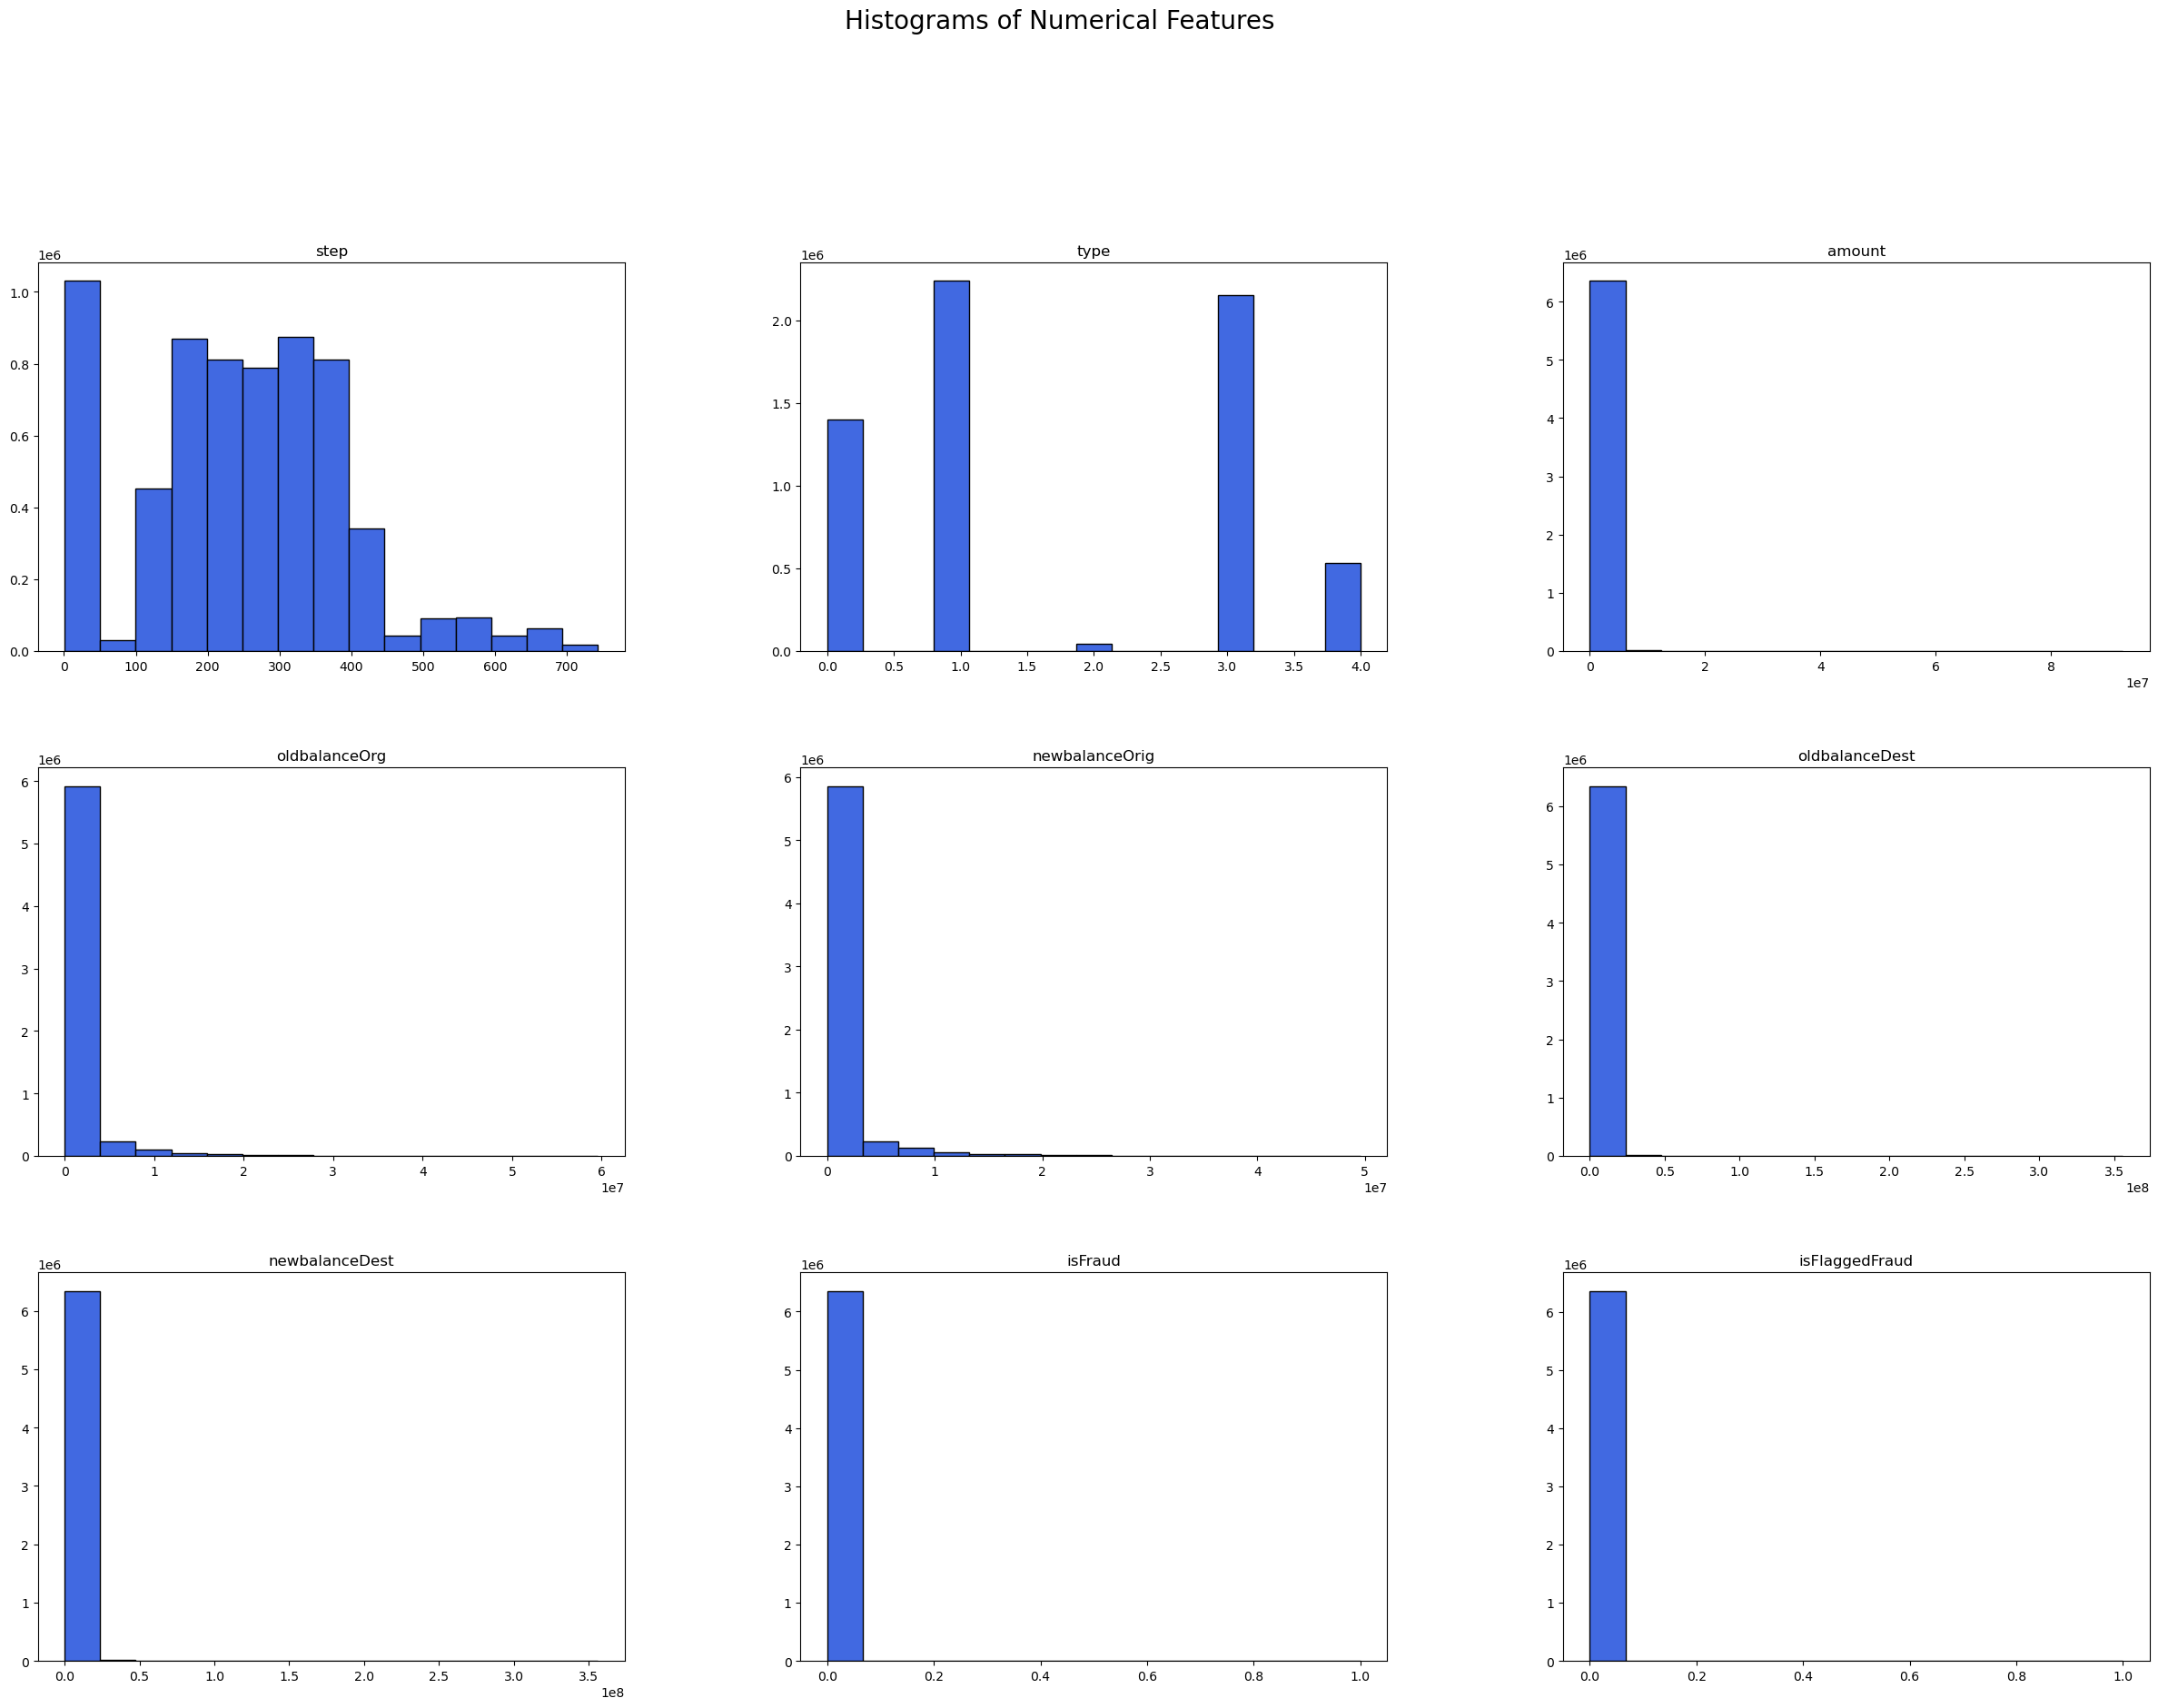

In [14]:
# Visualizing dataset to gain insights (Histograms) to decide which columns needs normal distribution

data.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of Numerical Features', x = 0.5, y = 1.02, size = 20)

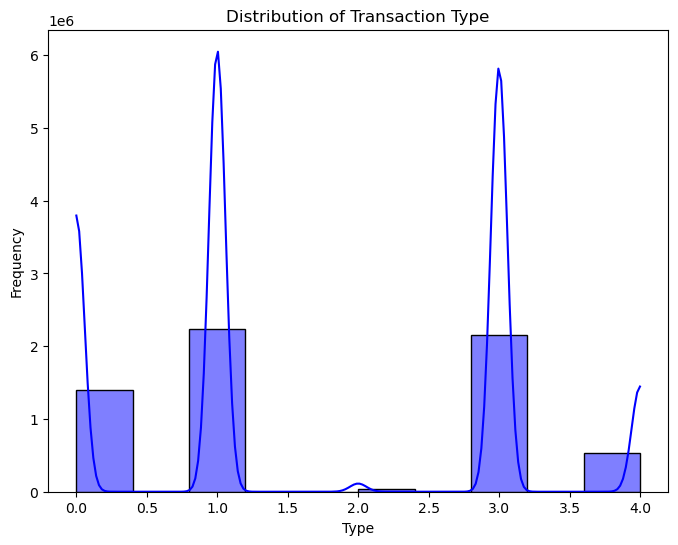

In [15]:
# Plotting the distribution of 'type'
plt.figure(figsize=(8, 6))

# Histogram showing the distribution of transaction type.
sns.histplot(data['type'], bins=10, kde=True, color='blue')
plt.title('Distribution of Transaction Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

Value Counts:
 isFraud
0    6354407
1       8197
Name: count, dtype: int64


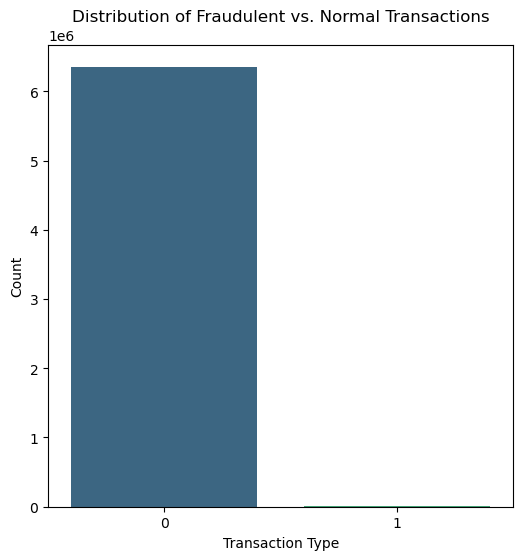

In [16]:
# Getting the value counts for the 'isFraud' variable
value_counts = data['isFraud'].value_counts()
print("Value Counts:\n", value_counts)

# Plotting a count plot to visualize the distribution of fraudulent vs. normal transactions
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')
plt.title('Distribution of Fraudulent vs. Normal Transactions')  # 1 = Fraud, 0 = Normal
plt.xlabel('Transaction Type')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()

Value Counts:
 type_catagory
CASH_OUT    2237484
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


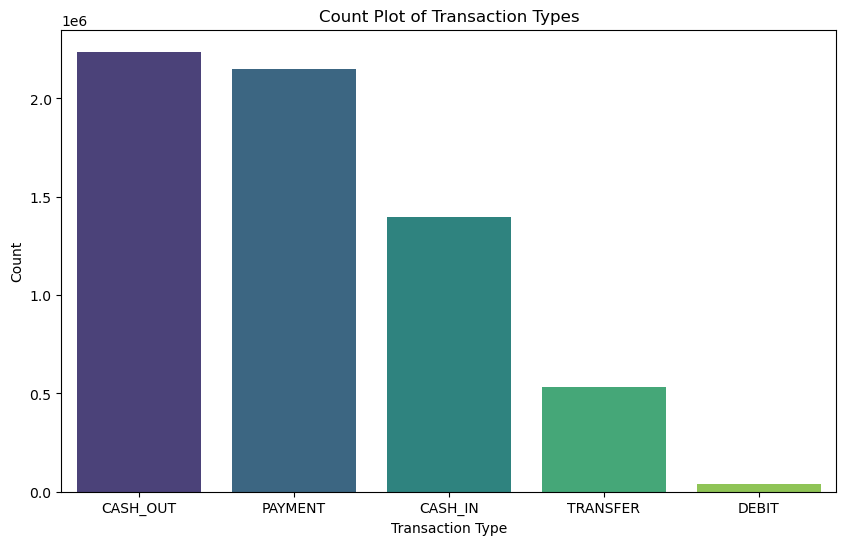

In [17]:
# Getting the value counts for the 'type' column to see the breakdown
value_counts = data['type_catagory'].value_counts()
print("Value Counts:\n", value_counts)

# Plotting a count plot to visualize transaction type popularity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type_catagory', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

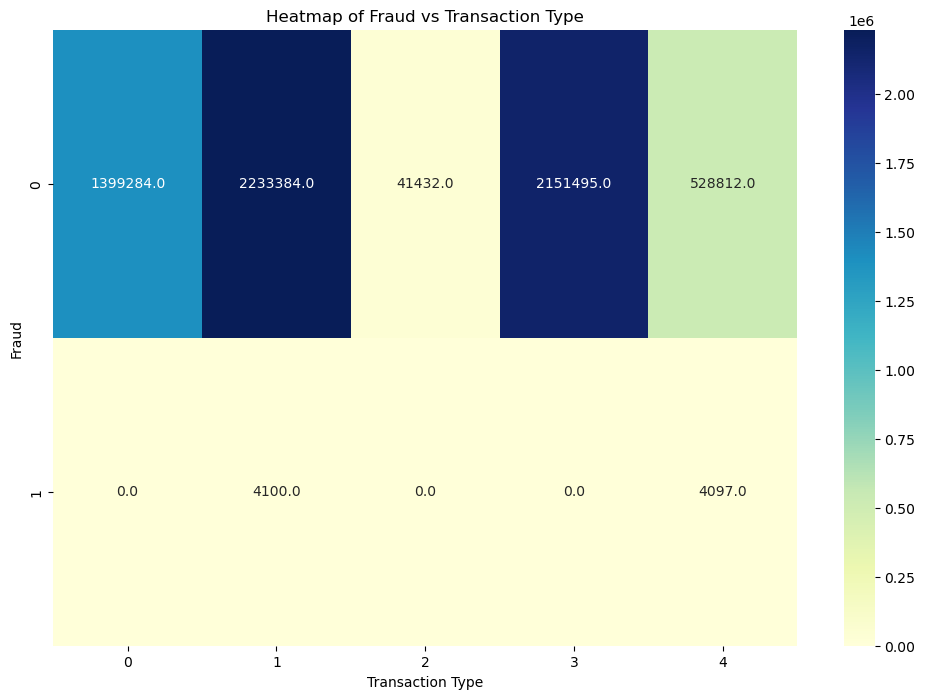

In [19]:
# Creating a pivot table where rows represent fraud, columns represent transaction type.
fraud_vs_type_matrix = pd.crosstab(data['isFraud'], data['type'])
plt.figure(figsize=(12, 8))

# A heatmap illustrating fraud against transaction type.
sns.heatmap(fraud_vs_type_matrix, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Heatmap of Fraud vs Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud')
plt.show()